In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../results/splits_trained_on.csv')

# Summary Statistics

In [26]:
print(f"Number of images: {len(df)}")
print(f"Number of individuals: {len(df['identity'].unique())}")
print(f"Number of encounters: {len(df.groupby(['identity', 'date']).size())}")

Number of images: 7582
Number of individuals: 400
Number of encounters: 1081


Number of individuals with more than 10 images: 239, 59.75%


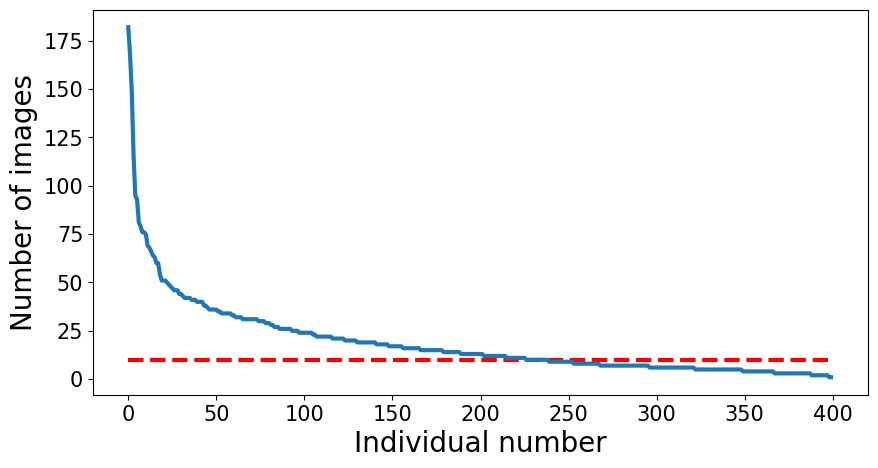

In [27]:
# Plot a line plot of the number of images per individual
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.hlines(10, 0, len(df.groupby('identity').size()), colors='r', linestyles='dashed', linewidth=3)
ax.plot(range(len(df.groupby('identity').size())), list(df.groupby('identity').size().sort_values(ascending=False)), linewidth=3)
ax.set_ylabel('Number of images', fontsize=20)
ax.set_xlabel('Individual number', fontsize=20)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

# Print number of individuals with more than 10 images
print(f"Number of individuals with more than 10 images: {sum(df.groupby('identity').size() >= 10)}, {sum(df.groupby('identity').size() >= 10) / len(df.groupby('identity').size()) * 100:.2f}%")

In [28]:
# Set date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [30]:
import datetime

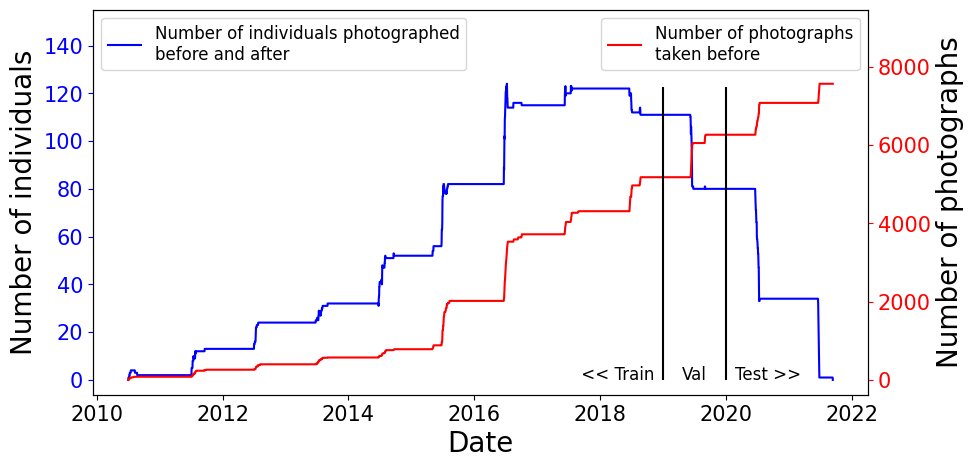

In [51]:
# Iterate over all dates possible
dates = pd.date_range(start=df['date'].min(), end=df['date'].max())
split_dict = {}

for date in dates:
    individuals_photographed_before = df[df['date'] < date]['identity'].unique()
    individuals_photographed_after = df[df['date'] > date]['identity'].unique()
    individuals_photographed_before_and_after = set(individuals_photographed_before).intersection(individuals_photographed_after)

    number_of_photographs_before = len(df[df['date'] < date])

    split_dict[date] = [len(individuals_photographed_before), len(individuals_photographed_after), len(individuals_photographed_before_and_after), number_of_photographs_before]

plt.figure(figsize=(10, 5))

max_individuals_photographed_before_and_after = max([split_dict[date][2] for date in dates])
max_number_of_photographs_before = max([split_dict[date][3] for date in dates])

plt.plot(dates, [split_dict[date][2] for date in dates], c='blue', label='Number of individuals photographed\nbefore and after')
plt.tick_params(axis='y', colors='blue')

plt.legend(loc='upper left', fontsize=12)

# Increase the size of the x-axis ticks
plt.xticks(fontsize=15)

# Increase the size of the y-axis ticks
plt.yticks(fontsize=15)

# Increase the range of the y-axis by 10%
plt.ylim(top=max_individuals_photographed_before_and_after * 1.25)

# Add labels
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of individuals', fontsize=20)

ax2 = plt.twinx()

ax2.plot(dates, [split_dict[date][3] for date in dates], c='red', label='Number of photographs\ntaken before')
ax2.tick_params(axis='y', colors='red')

plt.vlines(datetime.datetime(2019, 1, 1), 0, 7500, colors='black')
plt.vlines(datetime.datetime(2020, 1, 1), 0, 7500, colors='black')

# Add text just before the line, between the lines, and after the second line
plt.text(datetime.datetime(2018, 4, 1), 0, ' << Train', fontsize=12, horizontalalignment='center')
plt.text(datetime.datetime(2019, 7, 1), 0, 'Val', fontsize=12, horizontalalignment='center')
plt.text(datetime.datetime(2020, 9, 1), 0, 'Test >>', fontsize=12, horizontalalignment='center')

# Increase the size of the x-axis ticks
plt.xticks(fontsize=15)

# Increase the size of the y-axis ticks
plt.yticks(fontsize=15)

# Increase the range of the y-axis by 10%
plt.ylim(top=max([split_dict[date][3] for date in dates]) * 1.25)

# Add labels
plt.ylabel('Number of photographs', fontsize=20)

ax2.legend(loc='upper right', fontsize=12)

In [51]:
df

,image_id,identity,path,date,orientation,time-aware,encounter,random
0,3156,t001,images/t001/uUVqsYByEj.JPG,2014-07-14,right,train,train,train
1,3157,t001,images/t001/ELAvEqeXxT.JPG,2014-07-14,left,train,train,train
2,3158,t001,images/t001/CAluWEgwPX.JPG,2014-07-14,left,train,train,train
3,3159,t001,images/t001/txgBopXzbZ.jpg,2014-07-14,right,train,train,train
4,3160,t001,images/t001/zgOfklUqJC.JPG,2014-07-14,topright,train,train,test
...,...,...,...,...,...,...,...,...
7577,7680,t522,images/t522/jbPTvRHZOa.jpeg,2021-06-24,top,ignore,test,train
7578,7681,t522,images/t522/ZvuNglkjGh.jpeg,2021-06-24,left,ignore,test,test
7579,7682,t522,images/t522/cMYEitdLsa.jpeg,2021-06-24,right,ignore,test,test
7580,7683,t522,images/t522/wXnIvvzmHL.jpeg,2021-06-24,right,ignore,test,train


In [4]:
# Iterate over all images and get their resolutions
import os
from PIL import Image

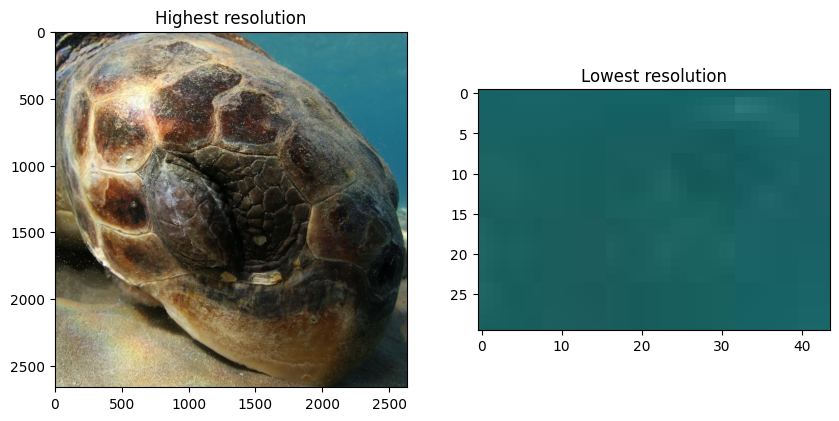

In [56]:


resolutions = []

for image in df['path']:
    image_path = os.path.join('../data/SeaTurtleIDHeads/', image)
    with Image.open(image_path) as img:
        resolutions.append(img.size)


# Plot the image with highest and lowest resolution
resolutions = pd.DataFrame(resolutions, columns=['width', 'height'])
resolutions['total_pixels'] = resolutions['width'] * resolutions['height']
resolutions['path'] = df['path']

highest_resolution = resolutions[resolutions['total_pixels'] == resolutions['total_pixels'].max()]['path'].values[0]
lowest_resolution = resolutions[resolutions['total_pixels'] == resolutions['total_pixels'].min()]['path'].values[0]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

with Image.open(os.path.join('../data/SeaTurtleIDHeads/', highest_resolution)) as img:
    ax[0].imshow(img)
    ax[0].set_title('Highest resolution')

with Image.open(os.path.join('../data/SeaTurtleIDHeads/', lowest_resolution)) as img:
    ax[1].imshow(img)
    ax[1].set_title('Lowest resolution')

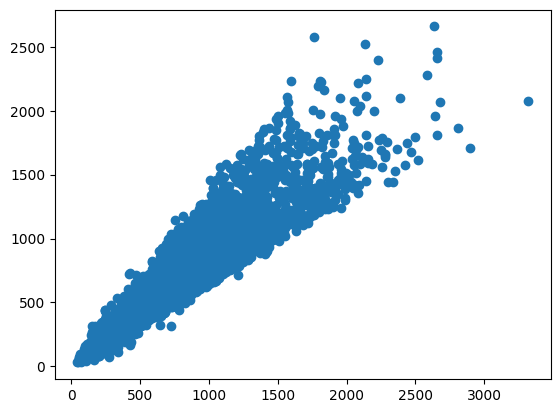

In [53]:
plt.scatter([resolution[0] for resolution in resolutions], [resolution[1] for resolution in resolutions])

In [58]:
# Print average resolution width and height
print(f"Average resolution width: {resolutions['width'].mean()}")
print(f"Average resolution height: {resolutions['height'].mean()}")

Average resolution width: 638.5912687945133
Average resolution height: 551.1093379055658


In [3]:
# Find the individual with the longest time range
individuals = df['identity'].unique()
individual_time_ranges = {}

for individual in individuals:
    individual_time_ranges[individual] = (earliest_dates[individual], latest_dates[individual])

individual_time_ranges = pd.DataFrame(individual_time_ranges).T
individual_time_ranges.columns = ['earliest', 'latest']
individual_time_ranges['time_range'] = individual_time_ranges['latest'] - individual_time_ranges['earliest']

individual_time_ranges.sort_values('time_range', ascending=False)

NameError: name 'earliest_dates' is not defined

Earliest image: 2012-07-01 00:00:00
Latest image: 2020-07-10 00:00:00
Resolution of earliest image: (1325, 917)


C:\Users\Viktor\AppData\Local\Temp\ipykernel_41564\164023635.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_df['date'] = pd.to_datetime(individual_df['date'])


[]

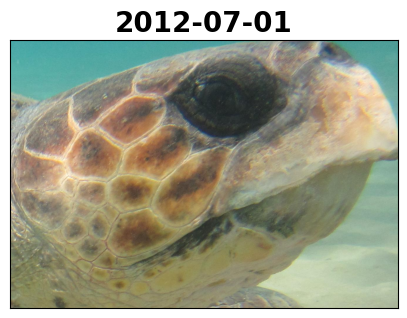

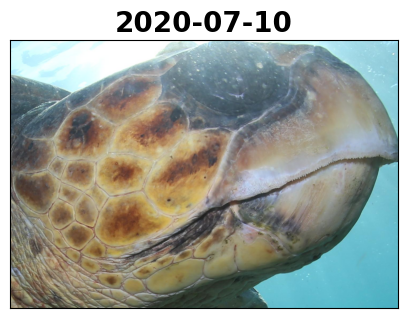

In [13]:
import os
from PIL import Image

# For one idividual, plot the earliest and latest images
individual = 't028'
individual_df = df[df['identity'] == individual]

individual_df['date'] = pd.to_datetime(individual_df['date'])

# Sort by date
individual_df = individual_df.sort_values('date')

earliest_image = individual_df.iloc[1]['path']
latest_image = individual_df.iloc[-1]['path']

fig1, ax1 = plt.subplots(1, 1, figsize=(5, 5))
fig2, ax2 = plt.subplots(1, 1, figsize=(5, 5))

# Print the date of the earliest and latest image
print(f"Earliest image: {individual_df.iloc[1]['date']}")
print(f"Latest image: {individual_df.iloc[-1]['date']}")

# Get the resolution of the larger image
with Image.open(os.path.join('../data/SeaTurtleIDHeads/', earliest_image)) as img:
    print(f"Resolution of earliest image: {img.size}")
    res = img.size

# Rescale the images to the same size
with Image.open(os.path.join('../data/SeaTurtleIDHeads/', earliest_image)) as img:
    img = img.resize(res)
    ax1.imshow(img)
    ax1.set_title(individual_df.iloc[1]['date'].strftime('%Y-%m-%d'), fontsize=20, fontweight='bold')

with Image.open(os.path.join('../data/SeaTurtleIDHeads/', latest_image)) as img:
    img = img.resize(res)
    ax2.imshow(img)
    ax2.set_title(individual_df.iloc[-1]['date'].strftime('%Y-%m-%d'), fontsize=20, fontweight='bold')

# Remove x and y ticks
ax1.set_xticks([])
ax1.set_yticks([])

ax2.set_xticks([])
ax2.set_yticks([])

Earliest image: 2012-07-10 00:00:00
Latest image: 2021-06-26 00:00:00


C:\Users\Viktor\AppData\Local\Temp\ipykernel_41564\3703669426.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual_df['date'] = pd.to_datetime(individual_df['date'])


[]

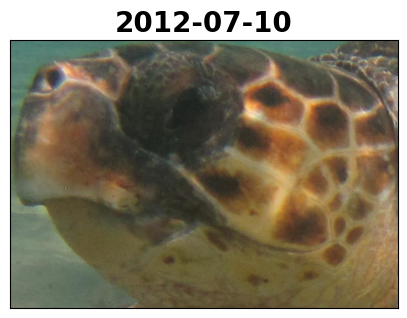

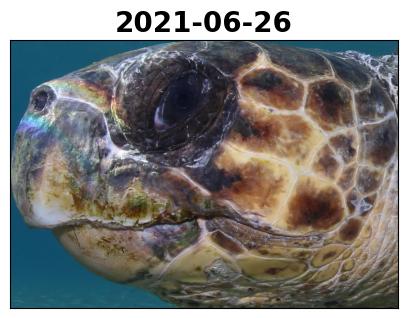

In [12]:
# For one idividual, plot the earliest and latest images
individual = 't033'
individual_df = df[df['identity'] == individual]

individual_df['date'] = pd.to_datetime(individual_df['date'])

# Sort by date
individual_df = individual_df.sort_values('date')

earliest_image = individual_df.iloc[12]['path']
latest_image = individual_df.iloc[-1]['path']

fig1, ax1 = plt.subplots(1, 1, figsize=(5, 5))
fig2, ax2 = plt.subplots(1, 1, figsize=(5, 5))

# Print the dates of the images
print(f"Earliest image: {individual_df.iloc[5]['date']}")
print(f"Latest image: {individual_df.iloc[-2]['date']}")

# Rescale the images to the same size
with Image.open(os.path.join('../data/SeaTurtleIDHeads/', earliest_image)) as img:
    img = img.resize(res)
    ax1.imshow(img)
    ax1.set_title(individual_df.iloc[1]['date'].strftime('%Y-%m-%d'), fontsize=20, fontweight='bold')

with Image.open(os.path.join('../data/SeaTurtleIDHeads/', latest_image)) as img:
    img = img.resize(res)
    ax2.imshow(img)
    ax2.set_title(individual_df.iloc[-1]['date'].strftime('%Y-%m-%d'), fontsize=20, fontweight='bold')

# Remove x and y ticks
ax1.set_xticks([])
ax1.set_yticks([])

ax2.set_xticks([])
ax2.set_yticks([])

Average number of encounters per individual: 2.7025
Number of individuals with a single encounter: 172, 43.00%
Average timespan of images per individual: 608 days 03:28:48


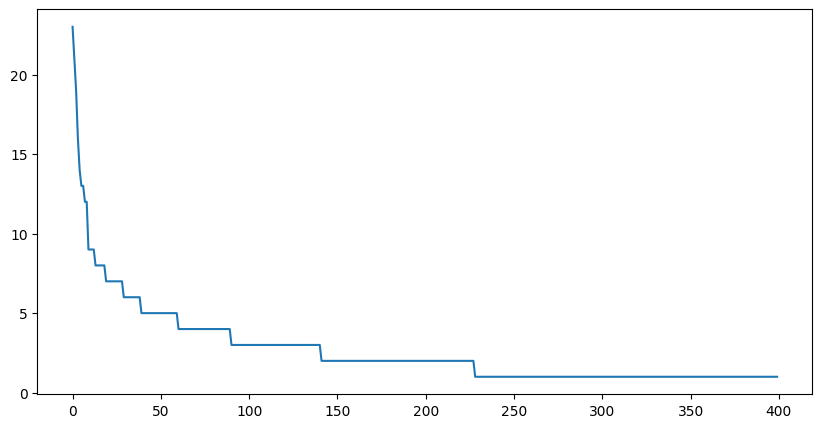

In [51]:
# Plot the number of encounters per individual
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

encounters_per_individual = df.groupby('identity')['date'].nunique()

print(f"Average number of encounters per individual: {encounters_per_individual.mean()}")
print(f"Number of individuals with a single encounter: {sum(encounters_per_individual == 1)}, {sum(encounters_per_individual == 1) / len(encounters_per_individual) * 100:.2f}%")
print(f"Average timespan of images per individual: {individual_time_ranges['time_range'].mean()}")

ax.plot(range(len(df.groupby('identity').size())), encounters_per_individual.sort_values(ascending=False))

In [44]:
# Print % of individuals with more than 5 encounters
print(f"Number of individuals with more than 5 encounters: {sum(encounters_per_individual >= 5)}, {sum(encounters_per_individual >= 5) / len(encounters_per_individual) * 100:.2f}%")

Number of individuals with more than 5 encounters: 60, 15.00%


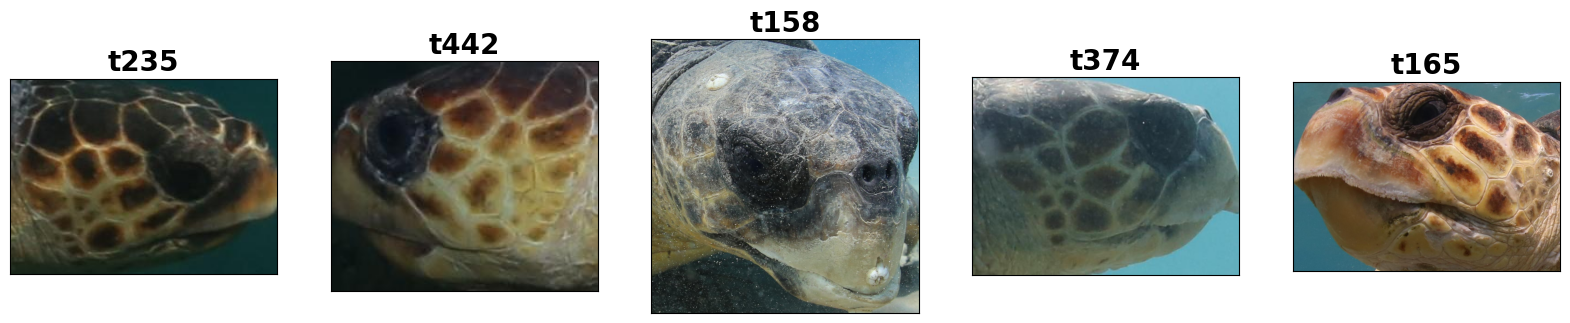

In [11]:
# Plot 5 random images in a row
import random

fig, ax = plt.subplots(1, 5, figsize=(20, 5))

for i in range(5):
    random_individual = random.choice(df['identity'].unique())
    random_individual_df = df[df['identity'] == random_individual]
    random_image = random.choice(random_individual_df['path'].values)

    with Image.open(os.path.join('../data/SeaTurtleIDHeads/', random_image)) as img:
        ax[i].imshow(img)
        ax[i].set_title(random_individual, fontsize=20, fontweight='bold')

        ax[i].set_xticks([])
        ax[i].set_yticks([])